# Czyszczenie danych i przygotowanie zbioru do analizy
### Autor: Tomasz Pawlik

### Cel


#### Wstęp
Na wstępie zaimportowano biblioteki które będą przydatne w procesie przygotowania zbioru, oraz wczytano zbiór danych z pliku tsv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("TitanicMess.tsv", sep='\t', encoding="UTF-8", header=0)

na tym etapie zbadano właściwości zaczytanego zbioru danych by dostępny był punkt odniesienia na dalszej drodze czyszczenia

In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",NaN,S,Titanic
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,"71,2833",C85,C,Titanic
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",NaN,S,Titanic
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",C123,S,Titanic
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",NaN,S,Titanic
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S,Titanic
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,"23,45",NaN,S,Titanic
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C,Titanic
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,"7,75",NaN,Q,Titanic


In [3]:
print(df.dtypes)

PassengerId     int64
Survived        int64
Pclass          int64
Name           object
Sex            object
Age            object
SibSp           int64
Parch           int64
Ticket         object
Fare           object
Cabin          object
Embarked       object
ship           object
dtype: object


Na tym etapie, by zachować spójność w nazewnictwie zmieniono nazwę kolumny 'ship' na 'Ship'

In [4]:
df.rename(columns = {'ship':'Ship'}, inplace = True)

#### Brakujące wartości danych
Jednym z częściej występujących problemów są brakujące wartości danych - wynikać to może z przyczyn jak scalanie zbioru z danych pochodzących z różnych źródeł czy straty wynikające z degradacji nośników.

Udział brakujących wartości danych w poszcególnych kolumnach został ukazany na poniższej heatmapie

<AxesSubplot:>

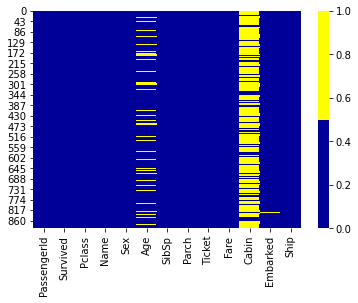

In [5]:
cols = df.columns
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

Na podstawie heatmapy możemy zaobserwować że najwięcej brakujących danych można znaleźć w kolumnie kajut, następnie w kolumnie wieku oraz niewielką ich ilość w kolumnie ukazującej mniejsce zaokrętowania pasażerów.

By wyobrażenie o skali problemu było trochę pełniejsze poniżej została ukazana lista z procentowym udziałem brakujących wartości danych z podziałem na kolumny

In [6]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100 , 2)))

PassengerId - 0.0%
Survived - 0.0%
Pclass - 0.0%
Name - 0.0%
Sex - 0.0%
Age - 19.39%
SibSp - 0.0%
Parch - 0.0%
Ticket - 0.0%
Fare - 0.0%
Cabin - 76.79%
Embarked - 0.22%
Ship - 0.0%


Obserwacje z heatmapy potwierdza również lista brakujących wartości ukazująca procentowy udział wartości brakujących we wszystkich wartościach. Tutaj tak jak w przypadku heatmapy zaobserwować można dużą ilość 76.79% brakujących danych jest obecna jeśli chodzi o informacje o kajutach, potem 19.39% jeśli chodzi o wiek. Informacja o brakujących wartościach jeśli chodzi o zaokrętowanie jest bardzo niewielka bo stanowi jedynie 0.22%

#### Zduplikowane dane

In [ ]:
Na początku zdefiniowano funkcje pomocnicze które znajdą zastosowanie w dalszym procesie czyszczenia danych

In [7]:
from difflib import SequenceMatcher

def similar(a, b):
    return SequenceMatcher(None, a, b).ratio()

def repairSex(a):
    if a == 'female' or a == 'male':
        return a
    female_sim = similar(a, 'female')
    male_sim = similar(a, 'male')
    if female_sim > male_sim:
        return 'female'
    else:
        return 'male'

In [8]:
# -------------- Inconsistent data ---

#sex
print('------Sex------')

#convert all mistyped data to one of two values
column_repaired_sex = df['Sex'].apply(repairSex)
print(column_repaired_sex)
df['Sex']=column_repaired_sex

#Wnioski -  w 4 wierszach znajdują się wartości wartości "femmale", "fem", "mal" oraz "malef", które nie należą do wyznaczników skończonej grupy płci.
# rzeczone wartości zostały programowo podciągnięte pod jedną z dwóch poprawnych wartości "female" bądź "male"


#age
print('------Age------')
print(df['Age'].value_counts(dropna=False))
df = df[df['Age'].notna()]

#converts , -> . decimal separator
df['Age'] = df['Age'].apply(lambda x: x.replace(',','.'))
print('----------replace decimal point------------------ok')
print(df['Age'].value_counts(dropna=False))

#converts to numeric
print('----------convert to numeric------------------ok')
df['Age'] = pd.to_numeric(df['Age'])
print(df['Age'].value_counts(dropna=False))

print('----------remove surreal values------------------ok')
df = df[df['Age'] > 0]
df = df[df['Age'] < 100]
print(df['Age'].value_counts(dropna=False))

print('---------everything ok?-----------ok')
print(df)

#Wnioski wiele wartości zostało wpisanych błędnie - te które leżą w granicach realnych możliwości jeśli chodzi o wiek, ale 
#mają zły format typu zostały wpisane jako napis a nie liczba można jeszcze użyć po przeformatowaniu. Niestety dla wartości które
#nie leżą w tych wartościach, wiersze je zawierające będą musiały zostać usunięte ze zbioru danych gdyż nie ma fizycznej możliwości
#naprostowania błędnych danych.
#na potrzeby korygowania danych przyjęto że wiek człowieka zawiera się w przediale (0, 100), co spowoduje odrzucenie wszelkich wartości mniejszych od 0 - liczb ujemnych,
#oraz odrzucone zostaną liczby trzycyfrowe, czterocyfrowe

#fare
print('------Fare------')
print(df['Fare'].value_counts(dropna=False))

#converts , -> . decimal separator
df['Fare'] = df['Fare'].apply(lambda x: x.replace(',','.'))
print('----------replace decimal point------------------ok')
print(df['Fare'].value_counts(dropna=False))

#remove unecesary letters symbols etc
df['Fare'] = df['Fare'].apply(lambda x: x.rstrip('a'))

#converts to numeric
df['Fare'] = pd.to_numeric(df['Fare'])
print(df['Fare'].value_counts(dropna=False))


#embarked

#za długi skrót

df['Embarked'] = df['Embarked'].astype(str)
df['Embarked'] = df['Embarked'].apply(lambda x: x.rstrip('oe'))
print(df['Embarked'].value_counts(dropna=False))

# --- Unnecessary data ---
print('------5------')
#duplicates
# we know that column 'id' is unique, but what if we drop it?
df_dedupped = df.drop('PassengerId', axis=1).drop_duplicates()

# there were duplicate rows
print(df.shape)
print(df_dedupped.shape)

#wypisać unikanlne id
print(df.PassengerId.nunique())

#Wnioski: Jak można zaobserwować 

print('------6------')

#redundat data
#drop ship column - redundat
df = df.drop('Ship', axis=1)
print(df)




------Sex------
0        male
1      female
2      female
3      female
4        male
        ...  
887    female
888    female
889      male
890      male
891      male
Name: Sex, Length: 892, dtype: object
------Age------
NaN    173
24      30
22      27
18      26
19      25
      ... 
74       1
80       1
53       1
-12      1
66       1
Name: Age, Length: 94, dtype: int64
----------replace decimal point------------------ok
24      30
22      27
18      26
19      25
30      24
        ..
36.5     1
74       1
0.92     1
34.5     1
250      1
Name: Age, Length: 93, dtype: int64
----------convert to numeric------------------ok
24.00    30
22.00    27
18.00    26
19.00    25
30.00    24
         ..
36.50     1
12.00     1
0.42      1
14.50     1
0.90      1
Name: Age, Length: 93, dtype: int64
----------remove surreal values------------------ok
24.0    30
22.0    27
18.0    26
19.0    25
30.0    24
        ..
80.0     1
66.0     1
53.0     1
23.5     1
0.9      1
Name: Age, Length: 8

<ipython-input-8-0f54e9f84b0a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].apply(lambda x: x.replace(',','.'))
<ipython-input-8-0f54e9f84b0a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = pd.to_numeric(df['Age'])


In [9]:
df.to_csv('TitanicCleaned.tsv', index=False, sep="\t")

In [10]:
# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['PassengerId' 'Survived' 'Pclass' 'Age' 'SibSp' 'Parch' 'Fare']


In [11]:
# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Name' 'Sex' 'Ticket' 'Cabin' 'Embarked']
